# Predicting house price using self implemented decision tree

## Summary 


*   30% of the random data is selected as validation test data.
*   First the sklearn Decision Tree regressor model is used. Parameters are tuned on validation test data and final result is given against actual test data.
*   For baseline reference, median based or mean based algorithm is used. Mean based baseline just returns the mean of training data sale price values and median based baseline just returns the median of training data sale price values. 
*   Self implemented decision tree is based on mean square error. So MSE is used as the criterion for splitting.



## Observations



*   Sklearn decision tree gives mean absolute error of 23949.34
*   Self implemented decision tree gives mean absolute error around 25000, which is in close margin to sklearn model.
*   Mean/Median based baseline algorithms give MAE roughly around 50000, so self implemented decision tree gives 100% more accuracy than it.
*   As we increase number of leaf nodes, error decreases and then eventually it starts increasing again. Same goes for depth, as we increase depth model performs better.



## Data Pre-processing

In [0]:
import numpy as np
import pandas as pd
df_train= pd.read_csv('./Datasets/q3/train.csv')
df_test = pd.read_csv('./Datasets/q3/test.csv')
df_y_test = pd.read_csv('./Datasets/q3/test_labels.csv',header=None)
n_train = df_train.shape[0]
y = df_train['SalePrice'].values
df_y_test = df_y_test.drop(columns=df_y_test.columns[0]).values
data = df_train
data.drop(['SalePrice'], axis=1, inplace=True)
data = pd.concat((data, df_test))


### Removing Unnecessary fields

'Id' column is not required at all, so we can directly remove it.


In [0]:
del df_train['Id']
del df_test['Id']
del data['Id']

### Dealing with Missing values

Observations when it comes to missing data

*   The features which have more than 20% missing data are not very useful so they can be directly dropped.
*   Garage related variables all have missing fields in same records, so it would be fine to just have one garage related variable and remove rest. Hence we will keep 'GarageCars' and remove rest, same goes for 'MasVnrArea', 'MasVnrType' and Bsmt variables.
*   Few outlier observations have missing data for a field which doesn't have missing data anywhere else, they can also be removed.



In [0]:
tobedropped = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageCond','GarageType','GarageYrBlt',\
               'GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrArea',\
               'MasVnrType']
for col in tobedropped:
  del df_train[col]
  del df_test[col]
  del data[col]

### Data Normalization


*   We can normalize the numerical fields 'SalePrice', 'GrLivArea'. We can apply log transformation to both fields.



In [0]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
data['GrLivArea'] = np.log(data['GrLivArea'])
df_test['GrLivArea'] = np.log(df_test['GrLivArea'])

### Conversion of categorical data to dummy data

In [0]:
df_train = pd.get_dummies(df_train)
data = pd.get_dummies(data)

## Sklearn Decision Tree

### On Validation Tests

In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.3, random_state=101)
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dtr_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dtr_pred))

Mean Absolute Error: 29352.44


### On Given Tests



In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(data[:n_train], y)
dtr_pred = dtreg.predict(data[n_train:])
dtr_pred= dtr_pred.reshape(-1,1)
print('Mean Absolute Error:', metrics.mean_absolute_error(df_y_test, dtr_pred))
print('Mean Squared Error:', metrics.mean_squared_error(df_y_test, dtr_pred))

Mean Absolute Error: 23949.347826086956


## Baseline Algorithm



### Mean based baseline algorithm

In [0]:
import pandas as pd

class DecisionTree:
  
  def train(self,filename):
    df = pd.read_csv(filename)
    self.ans = df["SalePrice"].mean()

  def predict(self, filename):
    df = pd.read_csv(filename)
    return [self.ans]*len(df)


from sklearn.metrics import mean_absolute_error,mean_squared_error
dtree_regressor = DecisionTree()
dtree_regressor.train('./Datasets/q3/train.csv')
predictions = dtree_regressor.predict('./Datasets/q3/test.csv')
test_labels = list()
with open("./Datasets/q3/test_labels.csv") as f:
  for line in f:
    test_labels.append(float(line.split(',')[1]))
print("")
print("Final Measurements on Test Data:")
print("Mean Absolute Error : ", mean_absolute_error(test_labels, predictions))
print("Mean Squared Error : ", mean_squared_error(test_labels, predictions))



Final Measurements on Test Data:
Mean Absolute Error :  54656.09460869566
Mean Squared Error :  5322462690.052036


### Median based baseline algorithm

In [0]:
import pandas as pd

class DecisionTree:
  
  def train(self,filename):
    df = pd.read_csv(filename)
    self.ans = df["SalePrice"].median()

  def predict(self, filename):
    df = pd.read_csv(filename)
    return [self.ans]*len(df)


from sklearn.metrics import mean_absolute_error,mean_squared_error
dtree_regressor = DecisionTree()
dtree_regressor.train('./Datasets/q3/train.csv')
predictions = dtree_regressor.predict('./Datasets/q3/test.csv')
test_labels = list()
with open("./Datasets/q3/test_labels.csv") as f:
  for line in f:
    test_labels.append(float(line.split(',')[1]))
print("")
print("Final Measurements on Test Data:")
print("Mean Absolute Error : ", mean_absolute_error(test_labels, predictions))
print("Mean Squared Error : ", mean_squared_error(test_labels, predictions))



Final Measurements on Test Data:
Mean Absolute Error :  51893.639130434785
Mean Squared Error :  5447828300.608696


## Self implemented decision tree



Depth of tree is 1
MAE :  31757.991365275146
Depth of tree is 2
MAE :  30648.159649129775
Depth of tree is 3
MAE :  25704.08480794183
Depth of tree is 4
MAE :  24365.91567801436
Depth of tree is 5
MAE :  24577.66018972949
Depth of tree is 6
MAE :  25539.85188946514


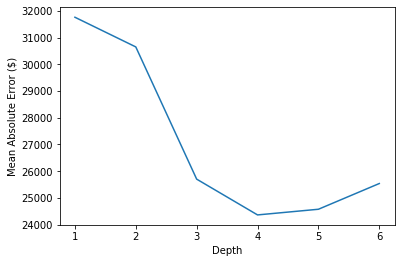


Final Measurements on Test Data:
Mean Absolute Error :  25262.996041760303
Mean Squared Error :  1370120282.0017579


In [6]:
import pandas
import numpy 
import matplotlib.pyplot as plt

class TreeNode:
    def __init__(self):
        self.attri = self.val = self.l_arr = self.data_list = None

class DecisionTree:
    def __init__(self):
        self.df = self.test_df = self.dtree = None        
        self.unique_vals = self.dcols = self.dtypes = []
        self.max_depth,self.min_thresh,self.skip = 5,0.001,10
        
    def load_data(self, train_filename):
        self.df = pandas.read_csv(train_filename, delimiter=',')
        self.dtypes, self.dcols = list(self.df.dtypes)[1:-1], list((self.df).columns[1:-1])
        
        for i,typ in enumerate(self.dtypes):
            toappend = None if str(typ) in ['float64', 'int64'] else list((self.df[self.dcols[i]]).unique())
            self.unique_vals += [toappend]

    def create_tree(self, temp_df, d = 0):
        if d > self.max_depth:
            node = TreeNode()
            node.data_list = temp_df
            return node
        
        if temp_df.size <= 3:
            node = TreeNode()
            node.data_list = temp_df
            return node
            
        thresh = numpy.var(temp_df['SalePrice'])
        if thresh <= self.min_thresh:
            node = TreeNode()
            node.data_list = temp_df
            return node

        n_t, cond_entropy = len(temp_df), list()

        for i,val in enumerate(self.dcols):
            col_dtype = str(self.dtypes[i])
            numer = set(['float64', 'int64'])
            if col_dtype in numer:
                min_d = temp_df[val].min(axis=None, skipna=None, level=None, numeric_only=None)
                max_d = temp_df[val].max(axis=None, skipna=None, level=None, numeric_only=None)
                step = (max_d - min_d + 1)/self.skip
                classes = []
                for q in range(1,self.skip):
                    classes.append(min_d + q*step)
                classes = [u for u in classes if u <= max_d]
                classes.sort()
                for class_ in classes:
                    mask = temp_df[val] <= class_
                    df_l,df_r = temp_df[mask], temp_df[~mask]

                    n_l, n_r = len(df_l), len(df_r)

                    if n_t == 0:
                        w_l = w_r = 0
                    else:
                        w_l = n_l / n_t
                        w_r = n_r / n_t

                    a_l, a_r = df_l['SalePrice'], df_r['SalePrice']
                    
                    sqrt_var_l,sqrt_var_r = numpy.sqrt(numpy.var(a_l)),numpy.sqrt(numpy.var(a_r))
                    mean_l,mean_r = numpy.mean(a_l),numpy.mean(a_r)
                    s_l,s_r = sqrt_var_l/mean_l,sqrt_var_r/mean_r
                    
                    if numpy.isnan(s_l):
                        s_l = 0
                    if numpy.isnan(s_r):
                        s_r = 0
                    
                    w_var = w_l*s_l+ w_r*s_r
                    cond_entropy += [(w_var, val, class_)]
            
            else:
                classes = self.unique_vals[i]
                for class_ in classes:
                    mask = temp_df[val] == class_
                    df_l, df_r = temp_df[mask], temp_df[~mask]

                    n_l, n_r = len(df_l), len(df_r)

                    if n_t == 0:
                        w_l = w_r = 0
                    else:
                        w_l = n_l / n_t
                        w_r = n_r / n_t

                    a_l, a_r = df_l['SalePrice'], df_r['SalePrice']
                    
                    sqrt_var_l,sqrt_var_r = numpy.sqrt(numpy.var(a_l)),numpy.sqrt(numpy.var(a_r))
                    mean_l,mean_r = numpy.mean(a_l),numpy.mean(a_r)
                    s_l,s_r = sqrt_var_l/mean_l,sqrt_var_r/mean_r
                    
                    if numpy.isnan(s_l):
                        s_l = 0
                    if numpy.isnan(s_r):
                        s_r = 0
                    
                    w_var = w_l*s_l+ w_r*s_r
                    cond_entropy += [(w_var, val, class_)]

        cond_entropy.sort(key=lambda x: x[0])
        splitter = cond_entropy[0]
        
        l_arr,val = [],splitter[2]

        if not str(type(splitter[2])) in ("<class 'str'>"):
            mask = temp_df[splitter[1]] <= splitter[2]
            l_arr.append(self.create_tree(temp_df[mask], d+1))
            l_arr.append(self.create_tree(temp_df[~mask], d+1))
            
        else:
            mask = temp_df[splitter[1]] == splitter[2]
            l_arr.append(self.create_tree(temp_df[mask], d+1))
            l_arr.append(self.create_tree(temp_df[~mask], d+1))

        root = TreeNode()
        root.data_list = root.data_list
        root.attri = splitter[1]
        root.val = val
        root.l_arr = l_arr
        return root

    def train(self, train_filename):
        mae = []
        self.load_data(train_filename)
        trial_depth = 7
        for depth in range(1,trial_depth):
            print("Depth of tree is",depth)
            self.max_depth = depth
            self.train_tree(train_filename)

            predictions = self.predict(None, 1)
            cur_mae = numpy.sum(numpy.abs(self.df.iloc[900:]['SalePrice']-predictions))/len(predictions)
            mae += [cur_mae]
            print("MAE : ", cur_mae)
        plt.plot(list(range(1,trial_depth)),mae)
        plt.ylabel('Mean Absolute Error ($)')
        plt.xlabel('Depth')
        plt.show()
        self.max_depth = mae.index(min(mae))+1
        
    def train_tree(self, train_filename):
        currdata = self.df[:900]
        self.dtree = self.create_tree(currdata)

    def predict(self, TEST_PATH, validate = 0):
        self.test_df = self.df[900:] if validate else pandas.read_csv(TEST_PATH)

        predicted_prices = []

        for i in range(len(self.test_df)):
            curr_node = self.dtree
            
            while curr_node.attri:
                
                if str(type(curr_node.val)) in ("<class 'str'>"):
                    ind = None
                    if self.test_df.iloc[i][curr_node.attri] in [curr_node.val]:
                        if not curr_node.l_arr[0].attri:
                            try:
                                if curr_node.l_arr[0].data_list.empty: ind = 1
                                else: ind = 0
                            except:
                                ind = 0
                        else:
                            ind = 0
                    else:
                        if not curr_node.l_arr[1].attri:
                            try:
                                if curr_node.l_arr[1].data_list.empty: ind = 0
                                else: ind = 1
                            except:
                                ind = 0
                        else:
                            ind = 1
                    curr_node = curr_node.l_arr[ind]

                else:
                    ind = None
                    if not self.test_df.iloc[i][curr_node.attri] > curr_node.val:
                        if not curr_node.l_arr[0].attri:
                            try:
                                if curr_node.l_arr[0].data_list.empty: ind = 1
                                else: ind = 0
                            except:
                                ind = 0
                        else:
                            ind = 0
                    else:
                        if curr_node.l_arr[1].attri:
                            ind = 1
                        else:
                            try:
                                if curr_node.l_arr[1].data_list.empty: ind = 0
                                else: ind = 1
                            except:
                                ind = 1

                    curr_node = curr_node.l_arr[ind]

            sm = numpy.sum(curr_node.data_list['SalePrice'])
            
            predicted_prices += [sm/len(curr_node.data_list['SalePrice'])]
        
        return predicted_prices

from sklearn.metrics import mean_absolute_error,mean_squared_error

dtree_regressor = DecisionTree()
dtree_regressor.train('./Datasets/q3/train.csv')
predictions = dtree_regressor.predict('./Datasets/q3/test.csv')
test_labels = list()
with open("./Datasets/q3/test_labels.csv") as f:
  for line in f:
    test_labels.append(float(line.split(',')[1]))
print("")
print("Final Measurements on Test Data:")
print("Mean Absolute Error : ", mean_absolute_error(test_labels, predictions))
print("Mean Squared Error : ", mean_squared_error(test_labels, predictions))
